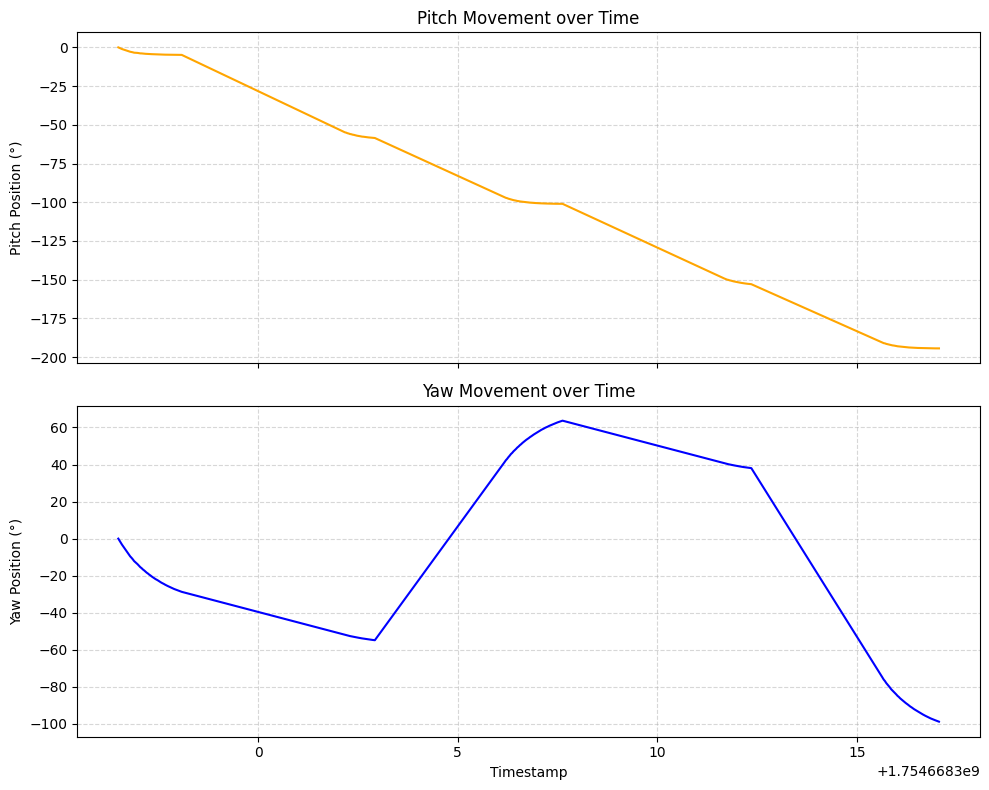

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# ===== โหลดไฟล์ =====
file_path = "gimbal_log_fire_marker.csv"
df = pd.read_csv(file_path)

# คำนวณ Δt (วินาที)
df["Delta_t"] = df["Timestamp"].diff().fillna(0)

# คำนวณตำแหน่งมุม (°)
df["YawPosition"] = (df["YawSpeed"] * df["Delta_t"]).cumsum()
df["PitchPosition"] = (df["PitchSpeed"] * df["Delta_t"]).cumsum()

# ===== สร้าง 2 กราฟ =====
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# กราฟ Pitch
axes[0].plot(df["Timestamp"], df["PitchPosition"], color='orange')
axes[0].set_ylabel("Pitch Position (°)")
axes[0].set_title("Pitch Movement over Time")
axes[0].grid(True, linestyle="--", alpha=0.5)

# กราฟ Yaw
axes[1].plot(df["Timestamp"], df["YawPosition"], color='blue')
axes[1].set_ylabel("Yaw Position (°)")
axes[1].set_title("Yaw Movement over Time")
axes[1].grid(True, linestyle="--", alpha=0.5)

# Label แกน X
axes[1].set_xlabel("Timestamp")

plt.tight_layout()
plt.show()


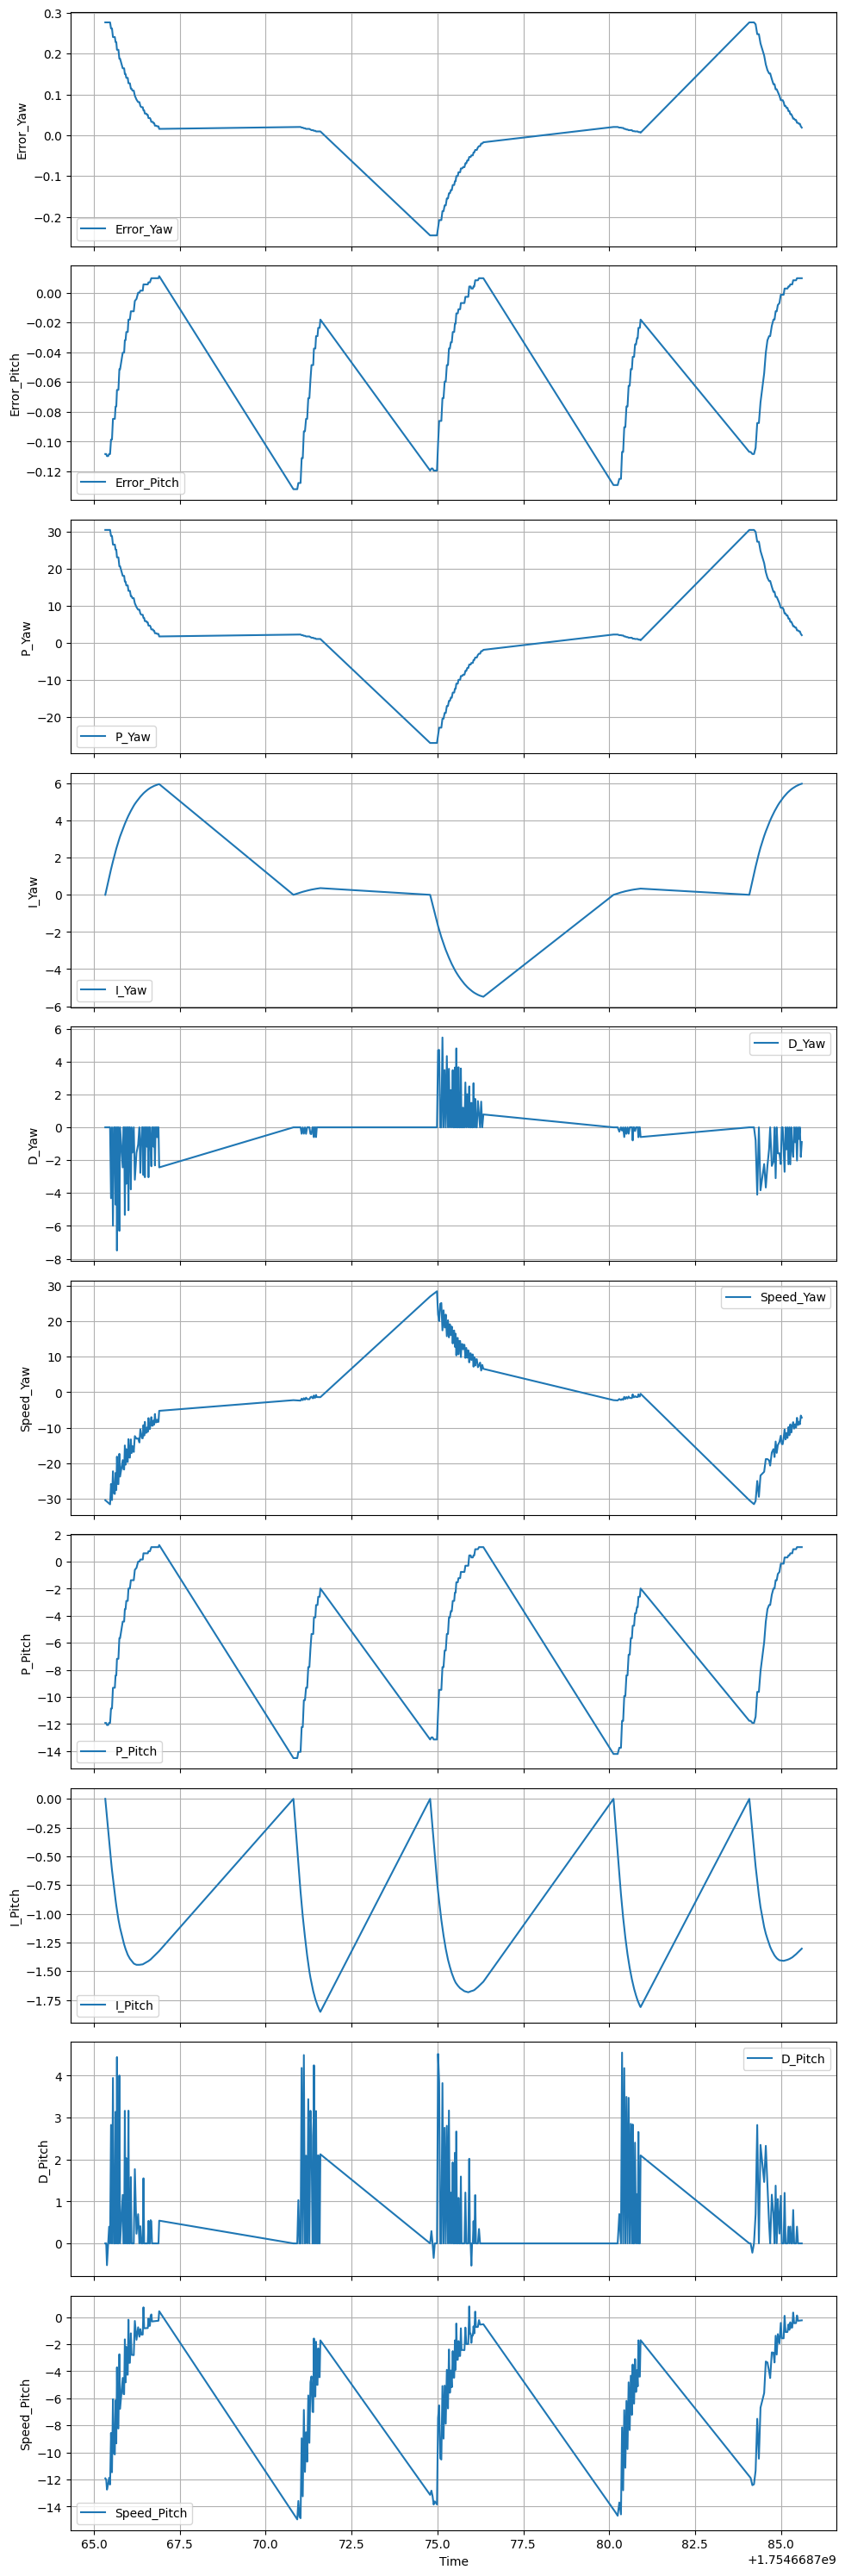

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ CSV
df = pd.read_csv('gimbal.csv')

# สมมติว่ามีคอลัมน์ 'time' เป็นแกนนอน
time = df['Timestamp']

# เลือกคอลัมน์ที่ต้องการ plot (ไม่เอาคอลัมน์ time)
columns_to_plot = [col for col in df.columns if col != 'Timestamp']

# สร้าง subplot จำนวนเท่ากับจำนวนคอลัมน์ข้อมูล
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(10, 3*len(columns_to_plot)), sharex=True)

for i, col in enumerate(columns_to_plot):
    axs[i].plot(time, df[col], label=col)
    axs[i].set_ylabel(col)
    axs[i].legend()
    axs[i].grid(True)

axs[-1].set_xlabel('Time')

plt.tight_layout()
plt.show()
